# In this Assignment, I will demonstrate the data visualization skills learned by completing this course. It requires two visualization plots to be generated. The first one will be a plot to summarize the results of a survey that was conducted to gauge an audience interest in different data science topics. The second plot is a Choropleth map of the crime crate in San Francisco.


#**Question 1**
A survey was conducted to gauge an audience interest in different data science topics, namely:

##Big Data (Spark / Hadoop)

##Data Analysis / Statistics

##Data Journalism

##Data Visualization

##Deep Learning

##Machine Learning 

The participants had three options for each topic: Very Interested, Somewhat interested, and Not interested. 2,233 respondents completed the survey.

The survey results have been saved in a csv file and can be accessed through this link: https://cocl.us/datascience_survey_data.
If you examine the csv file, you will find that the first column represents the data science topics and the first row represents the choices for each topic.
Use the pandas read_csv method to read the csv file into a pandas dataframe, that looks like the following:

In [0]:
#Lets start by reading the csv file and converting it into a DataFrame pandas
import pandas as pd
import numpy as np

survey = pd.read_csv('Topic_Survey_Assignment.csv')

In [0]:
#Lets rename topics column with a fancy name 
#survey.columns = ['Hot Topics','Very interested','Somewhat interested','Not interested']
#setting the df index to topics 
survey.rename( columns = {'Unnamed: 0' : 'Topics'} , inplace = True)
survey.set_index(['Topics'] ,inplace = True)
survey.index.name = ''

In [5]:
survey.head()

,Very interested,Somewhat interested,Not interested
,,,
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


In [6]:
survey

,Very interested,Somewhat interested,Not interested
,,,
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74



# Question 2
Use the artist layer of Matplotlib to replicate the bar chart below to visualize the percentage of the respondents' interest in the different data science topics surveyed.

In [0]:
#Importing matplotlib to plot bar chart of topics
import matplotlib as mpl
import matplotlib.pyplot as plt


#sort df using 'Very Interested' column
survey.sort_values(['Very interested'], ascending = False , axis = 0 , inplace = True)
total = survey.sum(axis = 1)
#getting percentage value
survey['Very interested'] = (survey['Very interested']/total)*100
survey['Not interested'] = (survey['Not interested']/total)*100
survey['Somewhat interested'] = (survey['Somewhat interested']/total)*100



In [8]:
#rounding off to 2
survey = round(survey,2)
survey

,Very interested,Somewhat interested,Not interested
,,,
Data Analysis / Statistics,77.01,20.26,2.74
Machine Learning,74.72,21.88,3.39
Data Visualization,61.58,33.73,4.69
Big Data (Spark / Hadoop),60.88,33.32,5.80
Deep Learning,58.23,35.50,6.27
Data Journalism,20.24,50.99,28.77


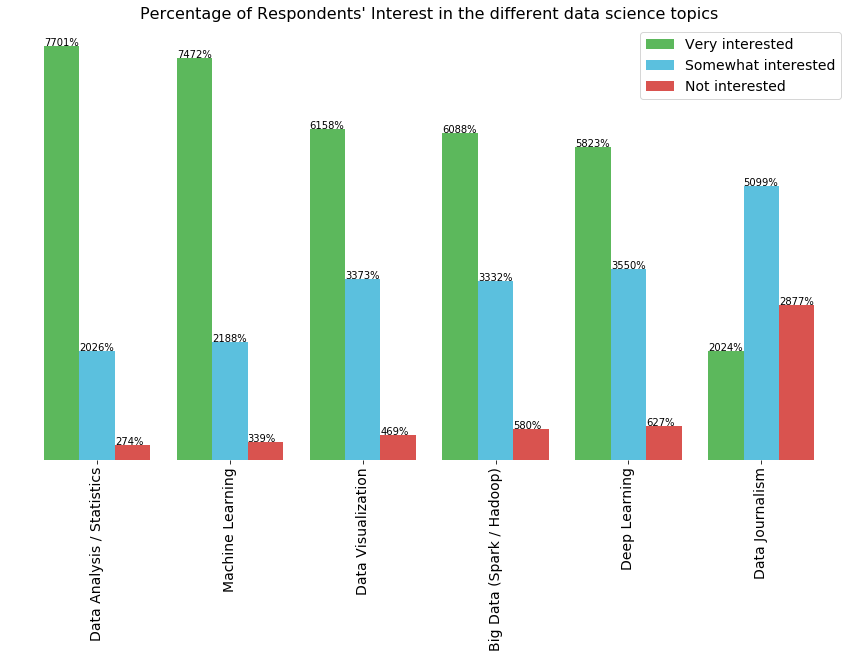

In [9]:
colors = ['#5cb85c','#5bc0de','#d9534f'] #list of colors 
ax = survey.plot(kind='bar',figsize=(15,8),width = 0.8,color = colors,edgecolor=None) #generating plot
plt.legend(labels=survey.columns,fontsize= 14) #setting up legend
plt.title("Percentage of Respondents' Interest in the different data science topics",fontsize= 16)
#making spines not visible by setting it to false , gca is get current axes method 
plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
  spine.set_visible(False)
plt.yticks([])

# display the percentages above the bars 
for p in ax.patches:
  width, height = p.get_width(), p.get_height()
  x, y = p.get_xy() 
  ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))


##Question 3
In the final lab, we created a map with markers to explore crime rate in San Francisco, California.

 In this question, you are required to create a Choropleth map to visualize crime in San Francisco.


Before you are ready to start building the map, let's restructure the data so that it is in the right format for the Choropleth map. Essentially, you will need to create a dataframe that lists each neighborhood in San Francisco along with the corresponding total number of crimes.

Based on the San Francisco crime dataset, you will find that San Francisco consists of 10 main neighborhoods, namely:

Central,
Southern,
Bayview,
Mission,
Park,
Richmond,
Ingleside,
Taraval,
Northern, and,
Tenderloin.

Convert the San Francisco dataset, which you can also find here, https://cocl.us/sanfran_crime_dataset, into a pandas dataframe, like the one shown below, that represents the total number of crimes in each neighborhood.


In [10]:
#lets import the dataset using pandas
import pandas as pd
import numpy as np
!conda install -c conda-forge folium=0.5.0 --yes
import folium
crime = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')


/bin/bash: conda: command not found


In [11]:
crime = pd.DataFrame(crime)
crime.head()
#city = ['Central', 'Southern', 'Bayview', 'Mission', 'Park', 'Richmond', 'Ingleside', 'Taraval', 'Northern','Tenderloin']
#crime.info()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200583e+13
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200583e+13
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",1.410593e+13
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",1.600137e+13
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",1.600027e+13


In [43]:
# get the frequency of occurence of values in PdDistrict column in a list
dataTemp = crime['PdDistrict'].value_counts()
# Convert to a dataframe
df2 = pd.DataFrame(data = dataTemp)
# set index:
df2 = df2.reset_index()
# rename columns
df2.rename(columns={'index':'Neighborhood', 'PdDistrict':'Count'}, inplace=True)
# display dataframe
df2.head(11)

,Neighborhood,Count
0,SOUTHERN,4333
1,MISSION,3372
2,NORTHERN,2818
3,CENTRAL,2614
4,BAYVIEW,2462
5,INGLESIDE,1988
6,TENDERLOIN,1886
7,TARAVAL,1817
8,PARK,1472
9,RICHMOND,1358


In [37]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)
# display the map of San Francisco
sanfran_map

In [38]:

# download SF geojson file
# !wget --quiet https://ibm.box.com/shared/static/cto2qv7nx6yq19logfcissyy4euo8lho.json -O world_countries.json
!wget --quiet https://cocl.us/sanfran_geojson    
print('GeoJSON file downloaded!')


GeoJSON file downloaded!


In [0]:

SF_geo = 'san-francisco.geojson' # geojson file

# create a plain world map
SF_map = folium.Map(location=[37.77, -122.42], zoom_start=11.5)

In [0]:
# generate choropleth map using the total crime numbers per district for SF
SF_map.choropleth(
    geo_data=SF_geo,
    data=crime,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)
folium.LayerControl().add_to(SF_map)
# display map
SF_map